## Домашняя работа
Группа: Т12О-101М-20

Студент: Гриньков Владислав Леонидович

## Введение в машинное обучение: линейная регрессия

Загрузка исходных данных

In [3]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

features = boston_dataset.data
y = boston_dataset.target
print('Фичи')
print(features)
print('\nЦелевая переменная y')
print(y[:10])


# текстовое описание датасета
# print('\n',boston_dataset.DESCR)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


Фичи
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

Целевая переменная y
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


## Задание 1

Реализуйте формулу матричного умножения для вычисления коэффициентов линейной регрессии на языке python 

Нужно написать код для аналитического вычисления коэффициентов линейной регрессии по формуле $\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}$


Сравните по евклидовому расстоянию коэффициенты из класса `LinearRegression` и полученные аналитическим способом

In [4]:
from numpy.linalg import inv, norm
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance

# вычисляем к-ты линейной регрессии
w_analytic = np.zeros(features.shape[1])
#-------- ВАШ КОД ТУТ -------------------

X = features

ones_p = np.ones((X.shape[0], 1))
X = np.hstack((ones_p, X))

w_analytic = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
#----------------------------------------

print(f'Аналитически определённые коэффициенты {w_analytic}')

Аналитически определённые коэффициенты [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

Проверка по евклидовой метрике

In [5]:
from numpy.linalg import inv, norm

# обучаем модель "из коробки"
reg = LinearRegression().fit(features, y)
# w_sklearn = reg.coef_
w_sklearn = np.append([reg.intercept_], reg.coef_)


try:
    linalg_norm = norm(w_sklearn - w_analytic)
    print(f"Коэффициенты, вычисленные моделью sklearn {w_sklearn}")
    print(f"Евклидово расстояние между наборами коэффициентов {linalg_norm}\n")
except Exception as err:
    print(err)
    print("!ВАЖНО!: к матрице фичей X нужно добавить столбец, который состоит из единиц")
    print("Это т.н. 'тривиальный' признак $x_0=1$")

Коэффициенты, вычисленные моделью sklearn [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]
Евклидово расстояние между наборами коэффициентов 2.2929511278467184e-11



Проверка на правильность

In [6]:
import unittest


class TestNotebook(unittest.TestCase):
    def test_task(self):
        self.assertAlmostEqual(linalg_norm, 0.000000, places=6)

unittest.main(argv=[''], verbosity=2, exit=False)

test_task (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


## Задание 2

Визуализируйте в виде "столбиков" коэффициенты "из коробки" (т.е. из sklearn) и полученные аналитически на одном графике. Для наглядности используйте различную "прозрачность" столбиков

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

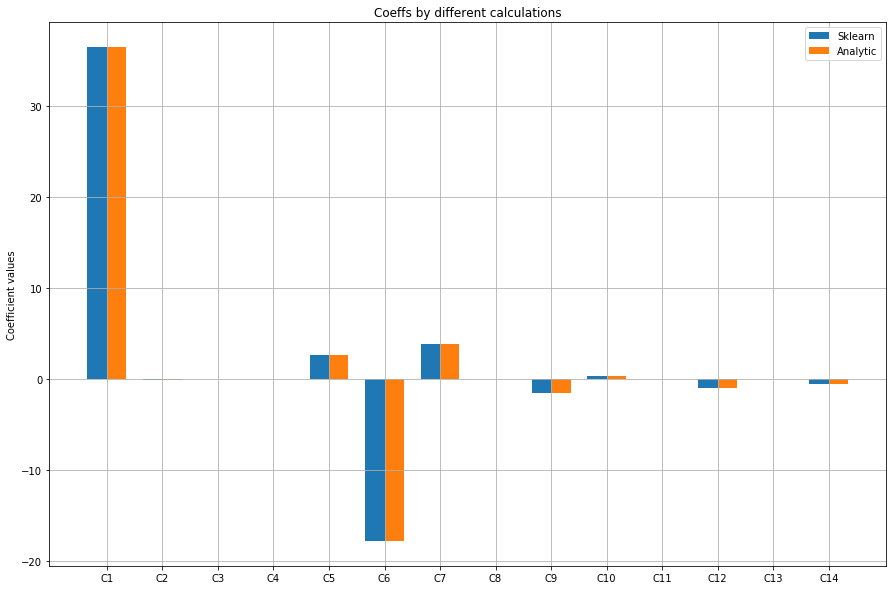

In [7]:
%matplotlib inline

#-------- ВАШ КОД ТУТ -------------------
from matplotlib import pyplot as plt

labels = [f'C{i}' for i in range(1, len(w_sklearn)+1)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, w_sklearn, width, label='Sklearn')
rects2 = ax.bar(x + width/2, w_analytic, width, label='Analytic')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Coefficient values')
ax.set_title('Coeffs by different calculations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=15)

fig.tight_layout()

#----------------------------------------

## Задание 3

Постройте предсказания двумя моделями

* вашей моделью
* моделью из библиотеки sklearn

Посчитайте, какую ошибку $(\hat{y}-y)$ даёт модели на каждом обучающем примере каждая из моделей и постройте две гистограммы на одном графике c наложением (одна должна "просвечивать" через другую)

Если вы всё сделали правильно, гистограммы ошибок должны совпасть

In [44]:
#-------- ВАШ КОД ТУТ -------------------
error_sklearn = reg.predict(features) - y
error_analytic = X.dot(w_analytic) - y
#----------------------------------------

No handles with labels found to put in legend.


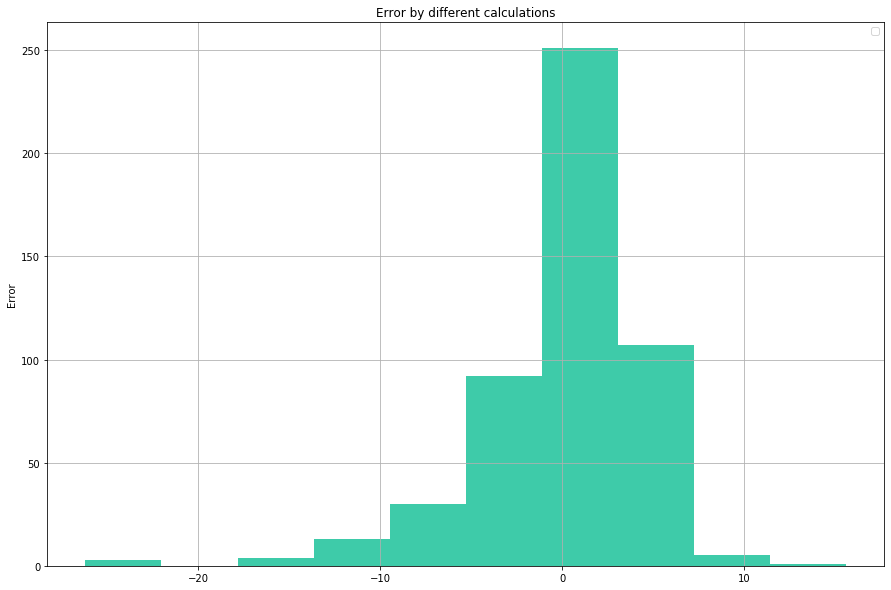

In [65]:
%matplotlib inline

#-------- ВАШ КОД ТУТ -------------------
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error')
ax.set_title('Error by different calculations')
ax.legend()
ax.grid(True)


# ax.bar(range(error_sklearn.shape[0]), error_sklearn, color=(0.1, 0.4, 0.6, 0.6))
# ax.bar(range(error_analytic.shape[0]), error_analytic, color=(0.1, 0.9, 0.6, 0.6))

# print(error_sklearn);
ax.hist(error_sklearn, color=(0.1, 0.4, 0.6, 0.6));
ax.hist(error_analytic, color=(0.1, 0.9, 0.6, 0.6));
# fig.tight_layout()

Вывод: гистограммы ошибок накладываются друг на друга - что соответсвует наложению (равентству).